For this task, you should use the dataset from the first homework. 

Your dataset must contain at least 1000 descriptors, excluding the target ("raw_value"), and all the data cleansing steps must have been completed.

Your task:

1. Choose one clustering algorithm suitable for your data and motivate your choice. Apply it, visualize and interpret your results. 

2. Apply automated feature engineering algorithms to your data. Select the most relevant features using common sense and domain knowledge, and motivate your choice.

3. Implement automated feature selection in the context of a machine learning problem of your choice. You are expected to use molecular descriptors as feature vectors and any molecular property as a target variable. Visualize and interpret your results on selected features and their importance.

Complete all the steps of the assignment in a Jupyter Notebook (one per team).
Upload the finalized Jupyter Notebook to the Google Drive of the course or to GitHub.

In [ ]:
import pandas as pd
import numpy as np
import requests
import re
from statistics import mean, median
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [264]:
df = pd.read_csv('/content/df_final_with_descriptors.csv', index_col = 'Unnamed: 0')
df

,Date,Journal,Title,Name,wavelength_added,RI,DOI_alt,SMILES,Method_ord,Publisher_ord,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,5/25/2011,Physical Chemistry Chemical Physics,Kirkwood correlation factors in liquid mixture...,Triglyme,589.0,1.421120,10.1039/C1CP20142E,COCCOCCOCCOC,1,1,...,0.946528,0.031934,0.549275,0.526084,0.492699,19.717294,19.944032,44.651635,0.919793,1.568058
1,9/13/1999,Journal of Alloys and Compounds,GROWTHOPTICALPROPERTIESREDOPEDBULKFIBERSINGLEC...,YVO4,589.0,2.168000,10.1016/S0925-8388(98)00420-4,[O-2].[O-2].[O-2].[O-2].[V].[Y+3],1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/4/1999,Colloids and Surfaces A: Physicochemical and E...,ADSORPTIONOILSURFACTANTMONOLAYERSSTRUCTUREMIXE...,Toluene,589.0,1.494000,10.1016/S0927-7757(98)00782-1,CC1=CC=CC=C1,1,0,...,0.645928,0.332469,0.550605,0.453388,0.125625,5.009615,5.919881,11.512744,0.468892,1.129618
3,8/5/2004,Materials Science and Engineering: B,Fabrication of PECVD-silicon oxynitride-based ...,silicon dioxide,589.0,1.460000,10.1016/j.mseb.2004.05.037,O=[Si]=O,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/1/2016,Optik,OPTIMIZATIONENHANCEMENTLIQUIDANALYTESENSINGPER...,Benzyne,589.0,1.354000,10.1016/j.ijleo.2016.11.171,C1=CC#CC=C1,2,0,...,0.560564,0.426347,0.464710,0.524683,0.276782,3.839450,3.713540,7.730048,0.480366,1.266175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,7/30/2011,Thermochimica Acta,THERMOPHYSICALSTUDYNHEXANENHEPTANE1CHLOROPROPA...,n-Heptane,589.0,1.390333,10.1016/j.tca.2011.07.023,CCCCCCC,0,0,...,0.856853,0.086350,0.562047,0.557496,0.590060,8.745269,9.755805,21.311787,0.785279,1.709602
2969,6/9/2015,RSC Adv.,Semitransparent polymer-based solar cells via ...,TiO2,26.0,1.640000,10.1039/C5RA05762K,O=[Ti]=O,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2970,6/17/2015,Phys. Chem. Chem. Phys.,Transformation of photophysical properties fro...,"1,4-Dioxane",589.0,1.420300,10.1039/C5CP02762D,C1COCCO1,0,1,...,0.552766,0.330474,0.649745,0.843263,0.503156,4.024970,4.630103,10.045862,0.329148,1.996164
2971,4/13/2017,Vibrational Spectroscopy,IMPROVEMENTSTIO2CATALYZEDAGNPSBASEDSERSSUBSTRA...,TiO2,589.0,1.630000,10.1016/j.vibspec.2017.03.005,O=[Ti]=O,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
np.percentile(np.array(sorted(df.isna().sum())), 75)

94.0

In [265]:
numeriacal_columns = df.select_dtypes(include='number').columns
df_1 = df[numeriacal_columns].replace([np.inf, -np.inf], np.nan)


perc = 20.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df_1.dropna(axis=1, 
                     thresh=min_count).dropna(axis=0)


In [266]:
corr_matrix = mod_df.corr(method='spearman').abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
mod_df = mod_df.drop(to_drop, axis=1)
mod_df = mod_df.loc[:,mod_df.apply(pd.Series.nunique) != 1]

In [267]:
mod_df.describe()

,wavelength_added,RI,Method_ord,Publisher_ord,MolecularWeight,TPSA,Charge,AtomStereoCount,BondStereoCount,CovalentUnitCount,...,n4Ring,n7Ring,n8Ring,nG12Ring,nF6Ring,nF7Ring,nF11Ring,nF12Ring,nFG12Ring,n3HeteroRing
count,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,...,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000
mean,592.751823,1.763127,0.739634,0.156041,139.707518,39.159385,-0.025858,0.423986,0.020508,1.099420,...,0.004904,0.007579,0.002229,0.003567,0.001783,0.004458,0.004904,0.009362,0.088720,0.001783
std,113.407471,0.710887,0.828772,0.411361,129.242567,44.354466,0.262511,1.731251,0.205908,0.775641,...,0.069873,0.086747,0.047172,0.059628,0.084459,0.084360,0.113626,0.120960,1.813487,0.066762
min,14.000000,1.053000,0.000000,0.000000,24.820000,0.000000,-3.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,589.000000,1.395015,0.000000,0.000000,73.090000,16.450000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,589.000000,1.468400,1.000000,0.000000,100.090000,26.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,589.000000,1.775000,1.000000,0.000000,157.010000,51.200000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1571.500000,5.425000,3.000000,2.000000,2855.840000,334.000000,1.000000,21.000000,5.000000,29.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,4.000000,3.000000,80.000000,3.000000


# Feature engineering

In [ ]:
!pip install autofeat

In [268]:
from autofeat.autofeat import AutoFeatRegressor
from sklearn.model_selection import train_test_split

In [272]:
from sklearn.preprocessing import MinMaxScaler
X_1 = mod_df.drop(['RI'], axis = 1)
y_1 = mod_df[['RI']]
X_2 = mod_df.drop(['TPSA'], axis = 1)
y_2 = mod_df[['TPSA']]
scaler = MinMaxScaler()
df_scaled_1 = scaler.fit_transform(X_1.to_numpy())
df_scaled_2 = scaler.fit_transform(X_2.to_numpy())
X_1 = pd.DataFrame(df_scaled_1, columns=X_1.columns)
X_2 = pd.DataFrame(df_scaled_2, columns=X_2.columns)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.33, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.33, random_state=42)

# For RI

In [277]:
to_drop = X_train_1.loc[:, X_train_1.std()==0].columns
X_train_1 = X_train_1.drop(to_drop, axis = 1)
X_test_1 = X_test_1.drop(to_drop, axis = 1)

In [278]:
model = AutoFeatRegressor(apply_pi_theorem=True, categorical_cols=None,
          feateng_cols=None, feateng_steps=2, featsel_runs=3,
          transformations=('exp', 'log', 'abs', 'sqrt', '^2', '^3', '1/'),)
model

AutoFeatRegressor(featsel_runs=3,
                  transformations=('exp', 'log', 'abs', 'sqrt', '^2', '^3',
                                   '1/'))

In [279]:
X_train_feature_creation_1 = model.fit_transform(X_train_1.to_numpy(), y_train_1.to_numpy().flatten())

In [280]:
X_test_feature_creation_1 = model.transform(X_test_1.to_numpy())
X_test_feature_creation_1

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x028**3*exp(x001),x044*x045**2,x001**3*x006**2,x002**3*x012**3,x001**2*x013**3,sqrt(x010)*x028**3,x028**3*sqrt(x034),exp(x010)*exp(x032),sqrt(x006)*sqrt(x009),sqrt(x008)*sqrt(x013)
0,0.369181,0.000000,0.0,0.028671,0.189222,0.75,0.0,0.0,0.071429,0.00,...,0.594913,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0
1,0.369181,0.666667,0.0,0.019444,0.102096,0.75,0.0,0.0,0.000000,0.00,...,1.158732,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0
2,0.369181,0.333333,0.0,0.028732,0.000000,0.75,0.0,0.0,0.000000,0.00,...,0.495726,0.0,0.0,0.0,0.0,0.137570,0.062521,1.161834,0.0,0.0
3,0.369181,0.333333,0.0,0.108272,0.218263,0.75,0.0,0.0,0.000000,0.25,...,0.765061,0.0,0.0,0.0,0.0,0.212313,0.000000,1.161834,0.0,0.0
4,0.369181,0.000000,0.0,0.007506,0.060479,0.75,0.0,0.0,0.000000,0.00,...,0.296031,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.369181,0.000000,0.0,0.045719,0.060479,0.75,0.0,0.2,0.000000,0.00,...,0.376049,0.0,0.0,0.0,0.0,0.000000,0.097355,1.000000,0.0,0.0
737,0.369181,0.666667,0.5,0.073126,0.153293,0.75,0.0,0.0,0.000000,0.00,...,1.158732,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0
738,0.369181,0.333333,0.5,0.042731,0.000000,0.75,0.0,0.0,0.000000,0.00,...,0.000658,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0
739,0.369181,0.333333,0.5,0.067626,0.157485,0.75,0.0,0.0,0.000000,0.00,...,0.816935,0.0,0.0,0.0,0.0,0.000000,0.051516,1.000000,0.0,0.0


In [281]:
X_train_feature_creation_1.shape[1] - X_train_1.shape[1]

20

In [282]:
X_train_feature_creation_1.columns

Index(['x000', 'x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008',
       'x009', 'x010', 'x011', 'x012', 'x013', 'x014', 'x015', 'x016', 'x017',
       'x018', 'x019', 'x020', 'x021', 'x022', 'x023', 'x024', 'x025', 'x026',
       'x027', 'x028', 'x029', 'x030', 'x031', 'x032', 'x033', 'x034', 'x035',
       'x036', 'x037', 'x038', 'x039', 'x040', 'x041', 'x042', 'x043', 'x044',
       'x045', 'x046', 'x028**3*x029**2', 'x009**2*x028**3',
       'exp(x033)*exp(x038)', 'sqrt(x003)*exp(x029)', 'sqrt(x003)*sqrt(x029)',
       'sqrt(x001)*sqrt(x006)', 'x002**3*x014', 'sqrt(x031)*x043',
       'x024**2*x033**3', 'x009**3*x016**3', 'x028**3*exp(x001)',
       'x044*x045**2', 'x001**3*x006**2', 'x002**3*x012**3', 'x001**2*x013**3',
       'sqrt(x010)*x028**3', 'x028**3*sqrt(x034)', 'exp(x010)*exp(x032)',
       'sqrt(x006)*sqrt(x009)', 'sqrt(x008)*sqrt(x013)'],
      dtype='object')

## Feature selection


In [ ]:
!pip install sklearn-genetic

In [283]:
from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import RandomForestRegressor
X_tr_1 = X_train_feature_creation_1
y_tr_1 = y_train_1

estimator = RandomForestRegressor()

model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="r2", max_features=5,
    n_population=5, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=20,
    caching=True, n_jobs=-1)

model_1 = model.fit(X_tr_1, y_tr_1)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [301]:
model_1.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False])

Features: Index(['x006', 'x029', 'x034', 'x040', 'x028**3*exp(x001)'], dtype='object')


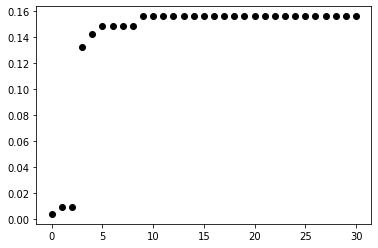

In [285]:
print('Features:', X_train_feature_creation_1.columns[model.support_])
plt.plot(model.generation_scores_, 'o', color='black')

## Feature importance

In [302]:
reg = RandomForestRegressor()
X_tr_1 = X_train_feature_creation_1.loc[:, model_1.support_]
y_tr_1 = y_train_1

In [303]:
reg.fit(X_tr_1, y_tr_1)

<ipython-input-303-64859840cde3>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_tr_1, y_tr_1)


RandomForestRegressor()

In [306]:
df_feature_importance = pd.DataFrame(reg.feature_importances_, index=X_train_feature_creation_1.loc[:, model_1.support_].columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
x028**3*exp(x001),0.702586
x029,0.117457
x006,0.095947
x034,0.080716
x040,0.003294


<Axes: >

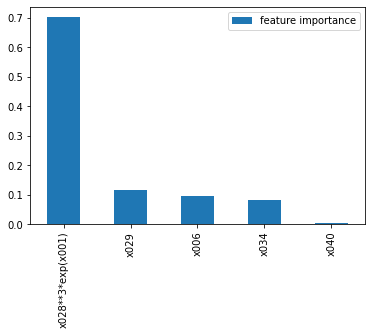

In [307]:
df_feature_importance.plot(kind='bar')

# For TPSA

In [286]:
to_drop = X_train_2.loc[:, X_train_2.std()==0].columns
X_train_2 = X_train_2.drop(to_drop, axis = 1)
X_test_2 = X_test_2.drop(to_drop, axis = 1)

In [287]:
model = AutoFeatRegressor(apply_pi_theorem=True, categorical_cols=None,
          feateng_cols=None, feateng_steps=2, featsel_runs=3,
          transformations=('exp', 'log', 'abs', 'sqrt', '^2', '^3', '1/'),)
model

AutoFeatRegressor(featsel_runs=3,
                  transformations=('exp', 'log', 'abs', 'sqrt', '^2', '^3',
                                   '1/'))

In [292]:
X_train_feature_creation_2 = model.fit_transform(X_train_2.to_numpy(), y_train_2.to_numpy().flatten())

In [293]:
X_test_feature_creation_2 = model.transform(X_test_2.to_numpy())
X_test_feature_creation_2

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x013*sqrt(x034),sqrt(x010)/x001,x001**2*x037**3,x033**3*exp(x012),x002**3*sqrt(x018),x002**2*sqrt(x007),x008**2*sqrt(x012),exp(x008)*log(x023),log(x022)*log(x023),sqrt(x010)*sqrt(x012)
0,0.369181,0.090805,0.000000,0.0,0.028671,0.75,0.0,0.0,0.071429,0.00,...,0.0,0.000000,0.0,0.955581,0.0,0.0,0.0,-0.459794,2.177473,0.000000
1,0.369181,0.225755,0.666667,0.0,0.019444,0.75,0.0,0.0,0.000000,0.00,...,0.0,0.000000,0.0,0.868154,0.0,0.0,0.0,-0.428097,2.177473,0.000000
2,0.369181,0.101555,0.333333,0.0,0.028732,0.75,0.0,0.0,0.000000,0.00,...,0.0,3.813667,0.0,0.736769,0.0,0.0,0.0,-0.428097,2.177473,0.000000
3,0.369181,0.052882,0.333333,0.0,0.108272,0.75,0.0,0.0,0.000000,0.25,...,0.0,7.323825,0.0,1.332230,0.0,0.0,0.0,-0.414649,2.150454,0.237171
4,0.369181,0.101327,0.000000,0.0,0.007506,0.75,0.0,0.0,0.000000,0.00,...,0.0,0.000000,0.0,0.868154,0.0,0.0,0.0,-0.428097,2.177473,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,0.369181,0.102242,0.000000,0.0,0.045719,0.75,0.0,0.2,0.000000,0.00,...,0.0,0.000000,0.0,0.915181,0.0,0.0,0.0,-0.419411,2.153978,0.000000
737,0.369181,0.163998,0.666667,0.5,0.073126,0.75,0.0,0.0,0.000000,0.00,...,0.0,0.000000,0.0,0.836485,0.0,0.0,0.0,-0.428097,2.177473,0.000000
738,0.369181,0.765554,0.333333,0.5,0.042731,0.75,0.0,0.0,0.000000,0.00,...,0.0,0.000000,0.0,0.952007,0.0,0.0,0.0,-0.428097,2.177473,0.000000
739,0.369181,0.086231,0.333333,0.5,0.067626,0.75,0.0,0.0,0.000000,0.00,...,0.0,0.000000,0.0,0.567758,0.0,0.0,0.0,-0.365925,2.144243,0.000000


In [294]:
X_train_feature_creation_2.shape[1] - X_train_2.shape[1]

45

In [295]:
X_train_feature_creation_2.columns

Index(['x000', 'x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008',
       'x009', 'x010', 'x011', 'x012', 'x013', 'x014', 'x015', 'x016', 'x017',
       'x018', 'x019', 'x020', 'x021', 'x022', 'x023', 'x024', 'x025', 'x026',
       'x027', 'x028', 'x029', 'x030', 'x031', 'x032', 'x033', 'x034', 'x035',
       'x036', 'x037', 'x038', 'x039', 'x040', 'x041', 'x042', 'x043', 'x044',
       'x045', 'x046', 'sqrt(x008)', 'x013*x016**3', 'x023**2*log(x023)',
       'sqrt(x010)*x028**3', 'exp(x006)*exp(x009)', 'exp(x016)*exp(x031)',
       'exp(x012)*exp(x013)', 'sqrt(x006)*exp(x003)', 'x012*x016**3',
       'x023**3/x019', 'x032*x037**3', 'x005*exp(x017)', 'x004*log(x001)',
       'sqrt(x012)*x022', 'x031**3*log(x001)', 'x023**2*exp(x005)',
       'sqrt(x012)*x045**2', 'exp(x016)*exp(x028)', 'exp(x006)*exp(x036)',
       'sqrt(x004)*exp(x013)', 'sqrt(x008)*sqrt(x015)',
       'sqrt(x001)*sqrt(x029)', 'sqrt(x028)*sqrt(x034)', 'x006*x031',
       'x006**2*x032', 'x008*x029**2', 'x0

## Feature selection

In [296]:
X_tr_2 = X_train_feature_creation_2
y_tr_2 = y_train_2

model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="r2", max_features=5,
    n_population=5, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=20,
    caching=True, n_jobs=-1)

model_2 = model.fit(X_tr_2, y_tr_2)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Features: Index(['x004', 'x013', 'x028', 'x023**3/x019', 'sqrt(x012)*x022'], dtype='object')


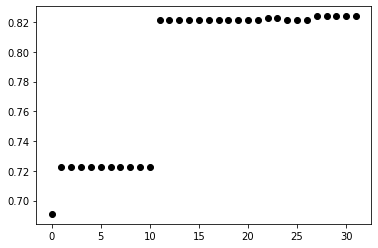

In [297]:
print('Features:', X_train_feature_creation_2.columns[model.support_])
plt.plot(model.generation_scores_, 'o', color='black')

## Feature importance

In [308]:
reg_2 = RandomForestRegressor()
X_tr_2 = X_train_feature_creation_2.loc[:, model.support_]
y_tr_2 = y_train_2

In [309]:
reg_2.fit(X_tr_2, y_tr_2)

<ipython-input-309-646a382fc0c9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_2.fit(X_tr_2, y_tr_2)


RandomForestRegressor()

In [310]:
df_feature_importance_2 = pd.DataFrame(reg_2.feature_importances_, index=X_train_feature_creation_2.loc[:, model.support_].columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance_2

,feature importance
x004,0.573385
x023**3/x019,0.285192
x028,0.091029
sqrt(x012)*x022,0.034570
x013,0.015824


<Axes: >

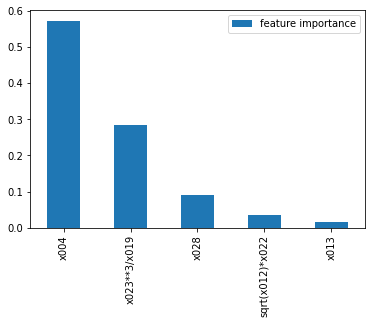

In [311]:
df_feature_importance_2.plot(kind='bar')